### Batches, Batch Normalization and Dropout

In this workbook you can experiment what you learnt about how to make batches out of your data, how to perform batch normalization and dropout

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load the data from data/batches_norm_drop.csv, then take a look at them.

In [2]:
# YOUR CODE HERE
df=pd.read_csv('data/batches_norm_drop.csv', header=None)
df



,0,1,2
0,0.350140,4.248592,0
1,0.950728,3.528855,0
2,1.371517,3.149416,0
3,0.268221,4.337209,0
4,1.881996,1.515387,0
...,...,...,...
745,-3.425455,3.349783,2
746,-1.513002,2.789840,2
747,-1.070356,3.484981,2
748,-2.970848,3.443924,2


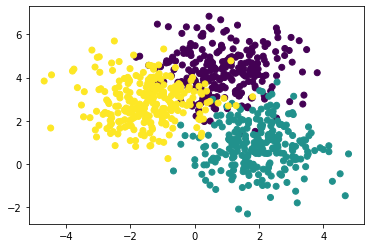

In [3]:
plt.scatter(x=df[0], y=df[1], c=df[2])
plt.show()

In [11]:
df[2].unique()

array([0, 1, 2], dtype=int64)

Now you are ready to code your own function to create batches. If needed rewatch the video we provided in Eduflow.

**Extra challange:**    Are you able to split between train and test _**without**_ using sklearn?

In [10]:
from sklearn.model_selection import train_test_split
import torch
def batchify(df, batch_size):
    X,y = df.drop([2], axis=1).values, df[2].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    X_train=torch.tensor(X_train.astype(np.float32))
    X_test=torch.tensor(X_test.astype(np.float32))
    y_train=torch.tensor(y_train.astype(np.float32))
    y_test=torch.tensor(y_test.astype(np.float32))

    nbatches=X_train.shape[0] // batch_size
    nbatches_test=X_test.shape[0] // batch_size

    index=np.random.permutation(X_train.shape[0])
    index_test=np.random.permutation(X_test.shape[0])

    X_train=X_train[index]
    y_train=y_train[index]

    X_test=X_test[index_test]
    y_test=y_test[index_test]

    X_train=X_train[ :batch_size*nbatches].reshape(nbatches, batch_size, X_train.shape[1])
    y_train=y_train[ :batch_size*nbatches].reshape(nbatches, batch_size,1)

    X_test=X_test[ :batch_size*nbatches_test].reshape(nbatches_test, batch_size, X_test.shape[1])
    y_test=y_test[ :batch_size*nbatches_test].reshape(nbatches_test, batch_size,1)

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = batchify(df=df ,batch_size=8)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

torch.Size([75, 8, 2])
torch.Size([75, 8, 1])
torch.Size([18, 8, 2])
torch.Size([18, 8, 1])


It's time to create your model! Remember to include the new tricks you learnt (batch normalization and dropout)!

In [46]:
# YOUR CODE HERE
from torch import nn
import torch.optim as optim
input_size=X_train.shape[0]
hidden_sizes=[32,16]
output_size=1

model=nn.Sequential(
                    nn.Linear(input_size, hidden_sizes[0]),
                    #nn.BatchNorm1d(hidden_sizes[0]),
                    nn.Softmax(),
                    nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                    #nn.BatchNorm1d(hidden_sizes[1]),
                    nn.Softmax(),
                    nn.Linear(hidden_sizes[1], output_size),
                    nn.Softmax(output_size)    
                    )
print(model)






Sequential(
  (0): Linear(in_features=75, out_features=32, bias=True)
  (1): Softmax(dim=None)
  (2): Linear(in_features=32, out_features=16, bias=True)
  (3): Softmax(dim=None)
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Softmax(dim=1)
)


In [48]:
def torch_fit(X_train, X_test,y_train, y_test,model,lr,num_epochs ):
    criterion=nn.L1Loss()
    optimizer=optim.Adam(model.parameters(), lr)
    

    train_losses=[]
    test_losses=[]

    for epoch in range(num_epochs):
        
        epoch_list=[]
        print(f"Epoch: {epoch+1}/{num_epochs}")

        for i, (X_train_batches, y_train_batches) in enumerate(zip(X_train,y_train)):
            optimizer.zero_grad()
            pred=model(X_train_batches)
            loss=criterion(pred, y_train_batches)
            epoch_list.append(loss.item())
            loss.backward()
            optimizer.step()
        
        model.eval()
        with torch.no_grad():
            test_epoch_list=[]
            for j ,(X_test_batches, y_test_batches) in enumerate(zip(X_test,y_test)):
                test_pred=model(X_test_batches)
                test_loss=criterion(test_pred, y_test_batches)
                test_epoch_list.append(test_loss.item())

        mean_epoch_losses_test=sum(test_epoch_list)/len(test_epoch_list)
        test_losses.append(mean_epoch_losses_test)
        mean_epoch_losses=sum(epoch_list)/len(epoch_list)
        train_losses.append(mean_epoch_losses)

        print(f'Mean epoch loss for train: {mean_epoch_losses}')
        print(f'Mean epoch loss for test: {mean_epoch_losses_test}')

model=torch_fit(X_train=X_train, X_test=X_test, y_train=y_train,y_test=y_test, lr=0.001,num_epochs=20, model=model)

        



Epoch: 1/20


RuntimeError: mat1 and mat2 shapes cannot be multiplied (8x2 and 75x32)

In [34]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

torch.Size([75, 8, 2])
torch.Size([18, 8, 2])
torch.Size([75, 8, 1])
torch.Size([18, 8, 1])


In [23]:
X_train.shape[0]

75

Train your model and evaluate it. **Extra challenge**: try to figure out how you can tell if batch norm and dropout are effective

In [ ]:
# YOUR CODE HERE